<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20521720---Truong-Y-Nhi/LSTM_MSFT_6_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [6]:
# 2. Đọc file csv và gắn index với giá Close
df = pd.read_csv('/content/MSFT.csv')
df1=df.reset_index()['Close']

In [7]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [9]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [12]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 402ms/step - loss: 0.0303 - val_loss: 0.0791
Epoch 2/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0066 - val_loss: 0.0042
Epoch 3/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0020 - val_loss: 0.0049
Epoch 4/100
12/12 [==============================] - 3s 227ms/step - loss: 9.7024e-04 - val_loss: 0.0043
Epoch 5/100
12/12 [==============================] - 3s 245ms/step - loss: 8.8445e-04 - val_loss: 0.0034
Epoch 6/100
12/12 [==============================] - 4s 298ms/step - loss: 7.6083e-04 - val_loss: 0.0033
Epoch 7/100
12/12 [==============================] - 3s 222ms/step - loss: 7.7790e-04 - val_loss: 0.0033
Epoch 8/100
12/12 [==============================] - 3s 226ms/step - loss: 7.7273e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 3s 227ms/step - loss: 7.3752e-04 - val_loss: 0.0035
Epoch 10/100
12/12 [==============================] - 4s 316ms/ste

In [14]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 33ms/step


In [15]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [16]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs((y_pred_val - yval)))
test_mae = np.mean(np.abs((y_pred - ytest)))
valid_mape = np.mean(np.abs((y_pred_val - yval)/yval))
test_mape = np.mean(np.abs((y_pred - ytest)/ytest))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 306.451220071865
Testing RMSE: 287.9655590780326
Validation MAE: 306.12951300774233
Testing MAE: 286.66741675242895
Validation MAPE: 348.69658950574467
Testing MAPE: 377.4360639729824


In [17]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<30):

    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.9170123]
101
1 day input [0.61634168 0.61428081 0.60882345 0.63702633 0.63763696 0.61683783
 0.63630121 0.65515402 0.70037788 0.67652565 0.67049574 0.71167427
 0.70850674 0.69663781 0.69465334 0.7260238  0.72926773 0.71839109
 0.69102776 0.67541887 0.65484871 0.65042172 0.66286308 0.64168229
 0.64526968 0.64244555 0.63042405 0.6488952  0.66484755 0.6708774
 0.6604969  0.65877955 0.65351302 0.63927796 0.65961916 0.68583757
 0.7035836  0.74464765 0.75697441 0.7294967  0.73541201 0.72972568
 0.7502195  0.76132511 0.74533456 0.74094578 0.76109614 0.77460596
 0.79082548 0.78674206 0.78655117 0.77571273 0.80341952 0.79498541
 0.76995    0.77246881 0.7967027  0.78258225 0.79273365 0.79109265
 0.79139802 0.78246764 0.78113201 0.76590467 0.74167089 0.81780715
 0.85390986 0.86318369 0.85669584 0.85612341 0.85226885 0.85612341
 0.87612108 0.86848837 0.8621914  0.88245625 0.87406021 0.86970963
 0.8715796  0.8802809  0.8889059  0.90615579 0.90546888 0.91630732
 0.89371455 0.88833347 0.93439693 0

Validation RMSE: 306.451220071865
Testing RMSE: 287.9655590780326
Validation MAE: 306.12951300774233
Testing MAE: 286.66741675242895
Validation MAPE: 348.69658950574467
Testing MAPE: 377.4360639729824


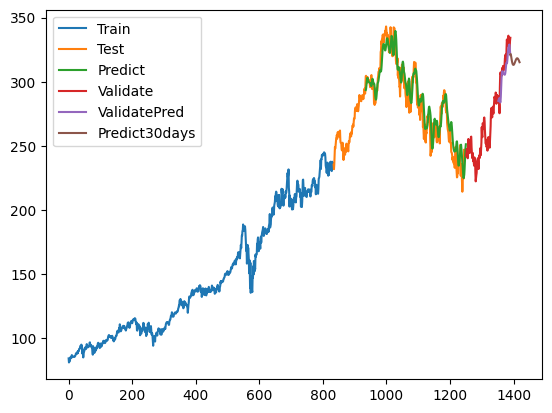

In [18]:
# 14.Vẽ hình
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+time_step+1, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+time_step+1, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()